In [1]:
import numpy as np

def inspect_hs_basic(img):
    print("=== HYPERSPECTRAL IMAGE BASIC INFO ===")
    print("Shape (H, W, Bands):", img.shape)
    print("Dtype:", img.dtype)
    print("Global Min:", img.min())
    print("Global Max:", img.max())
    print("Global Mean:", img.mean())
    print("Global Std:", img.std())
import tifffile as tiff

img = tiff.imread(r'D:\Kaggle\Quang Phổ Lúa mì\Data\train\HS\Health_hyper_1.tif')

inspect_hs_basic(img)



=== HYPERSPECTRAL IMAGE BASIC INFO ===
Shape (H, W, Bands): (32, 32, 125)
Dtype: uint16
Global Min: 163
Global Max: 4805
Global Mean: 2105.8834140625
Global Std: 1090.1573021572538


In [2]:
def inspect_hs_bands(img, band_indices=None):
    H, W, B = img.shape
    if band_indices is None:
        band_indices = range(B)
        
    for b in band_indices:
        band = img[:, :, b]
        print(f"\nBand {b}:")
        print("  Min:", band.min())
        print("  Max:", band.max())
        print("  Mean:", band.mean())
        print("  Std:", band.std())
inspect_hs_bands(img, band_indices=[10, 20, 30])


Band 10:
  Min: 306
  Max: 1112
  Mean: 752.384765625
  Std: 196.64874499609402

Band 20:
  Min: 498
  Max: 1420
  Mean: 1034.9599609375
  Std: 197.13868095755834

Band 30:
  Min: 559
  Max: 1821
  Mean: 1274.4833984375
  Std: 280.7234928036628


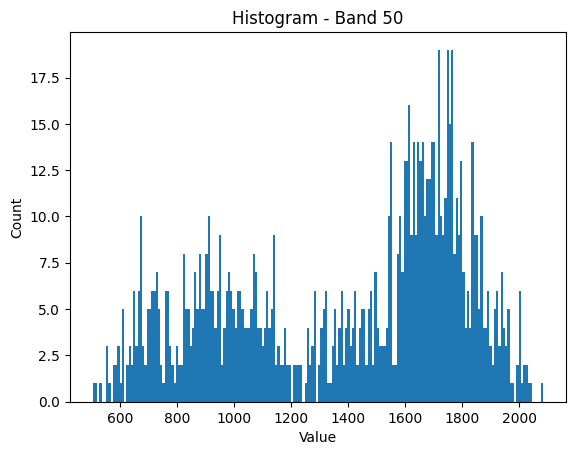

In [4]:
import matplotlib.pyplot as plt

def plot_hs_band_hist(img, band_idx):
    band = img[:, :, band_idx]
    plt.figure()
    plt.hist(band.ravel(), bins=200)
    plt.title(f"Histogram - Band {band_idx}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()
plot_hs_band_hist(img, band_idx=50)

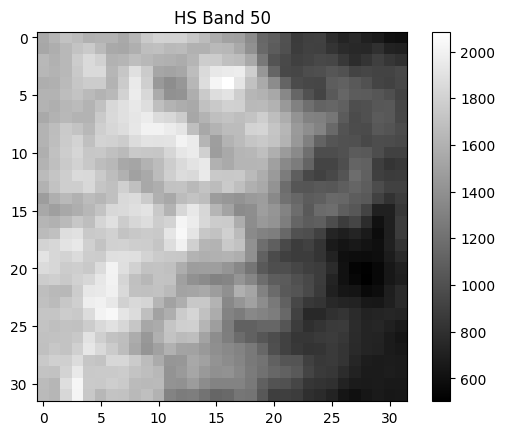

In [5]:
def show_hs_band(img, band_idx):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.imshow(img[:, :, band_idx], cmap="gray")
    plt.colorbar()
    plt.title(f"HS Band {band_idx}")
    plt.show()
show_hs_band(img, band_idx=50)

In [6]:
def band_correlation(img, band1, band2):
    b1 = img[:, :, band1].ravel()
    b2 = img[:, :, band2].ravel()
    corr = np.corrcoef(b1, b2)[0, 1]
    print(f"Correlation Band {band1} vs Band {band2}: {corr:.4f}")
band_correlation(img, band1=10, band2=20)

Correlation Band 10 vs Band 20: 0.9601


In [10]:
def inspect_pixel_spectrum(img, x, y):
    spectrum = img[y, x, :]
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(spectrum)
    plt.xlabel("Band index")
    plt.ylabel("Reflectance")
    plt.title(f"Spectrum at pixel ({x}, {y})")
    plt.show()
inspect_pixel_spectrum(img, x=100, y=100)

IndexError: index 100 is out of bounds for axis 0 with size 32